In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/risqikhoirul/DataMining/main/karyawan.txt')

In [8]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [9]:
# Menerapkan one-hot encoding untuk kolom kategorikal
X_encoded = pd.get_dummies(X, columns=['Education', 'Gender', 'EverBenched'])

In [10]:
# Membagi dataset menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Accuracy: 0.5

Confusion Matrix:
 [[1 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



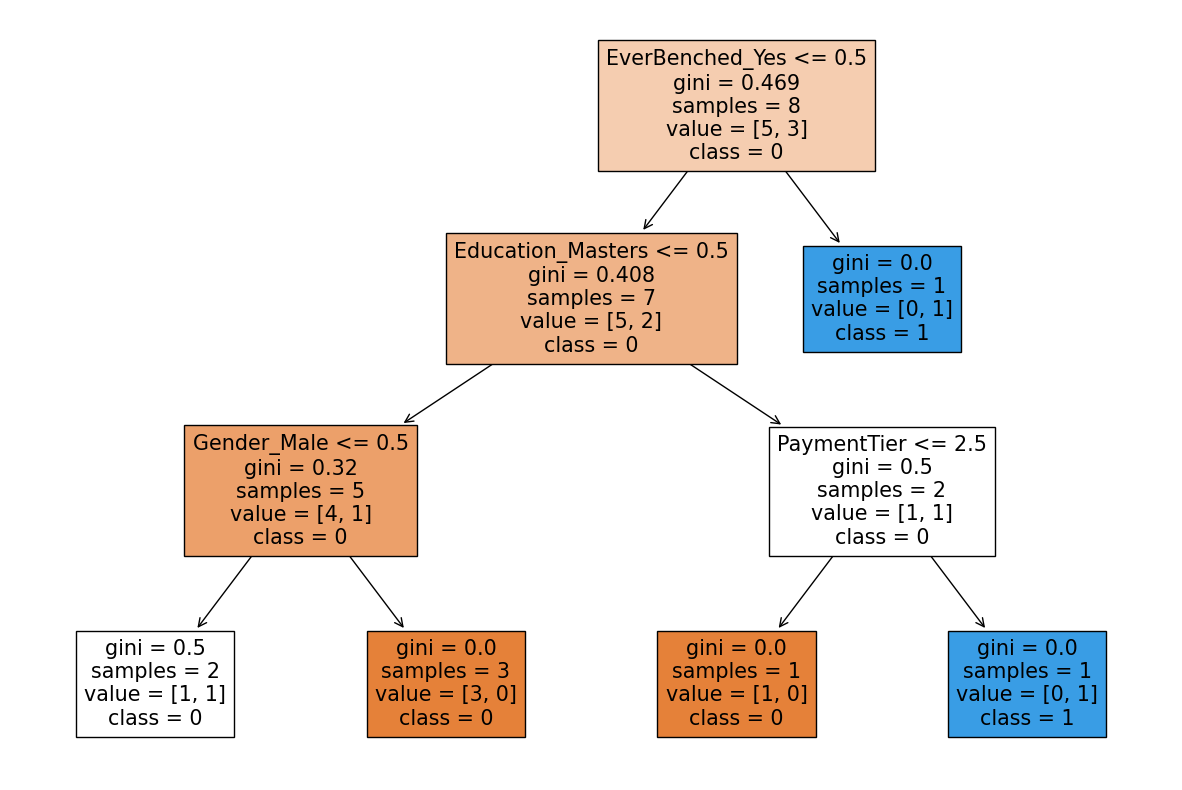

In [26]:
# Inisialisasi model dan melatihnya
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X_encoded.columns, class_names=list(map(str, model.classes_)), filled=True)
plt.show()